Fear/Greed Columns: Index(['timestamp', 'value', 'classification', 'date'], dtype='object')
Historical Columns: Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')
Unique Coins: ['@107' 'AAVE' 'DYDX' 'AIXBT' 'GMX' 'EIGEN' 'HYPE' 'SOL' 'SUI' 'DOGE'
 'ETH' 'kPEPE' 'TRUMP' 'ONDO' 'ENA' 'LINK' 'XRP' 'S' 'BNB' 'BERA' 'WIF'
 'LAYER' 'MKR' 'KAITO' 'IP' 'JUP' 'USUAL' 'ADA' 'BTC' 'PURR/USDC' 'ZRO'
 '@7' '@19' '@21' '@44' '@48' '@11' '@15' '@46' '@61' '@28' '@45' '@9'
 '@41' '@38' 'kSHIB' 'GRASS' 'TAO' 'AVAX' '@2' '@6' '@8' '@10' '@12' '@16'
 '@17' '@35' '@26' '@24' '@32' '@29' '@31' '@33' '@34' '@36' '@37' '@47'
 '@53' '@74' 'RUNE' 'CANTO' 'NTRN' 'BLUR' 'ZETA' 'MINA' 'MANTA' 'RNDR'
 'WLD' 'kBONK' 'ALT' 'INJ' 'STG' 'ZEN' 'MAVIA' 'PIXEL' 'ILV' 'FET' 'STRK'
 'CAKE' 'STX' 'ACE' 'PENDLE' 'AR' '

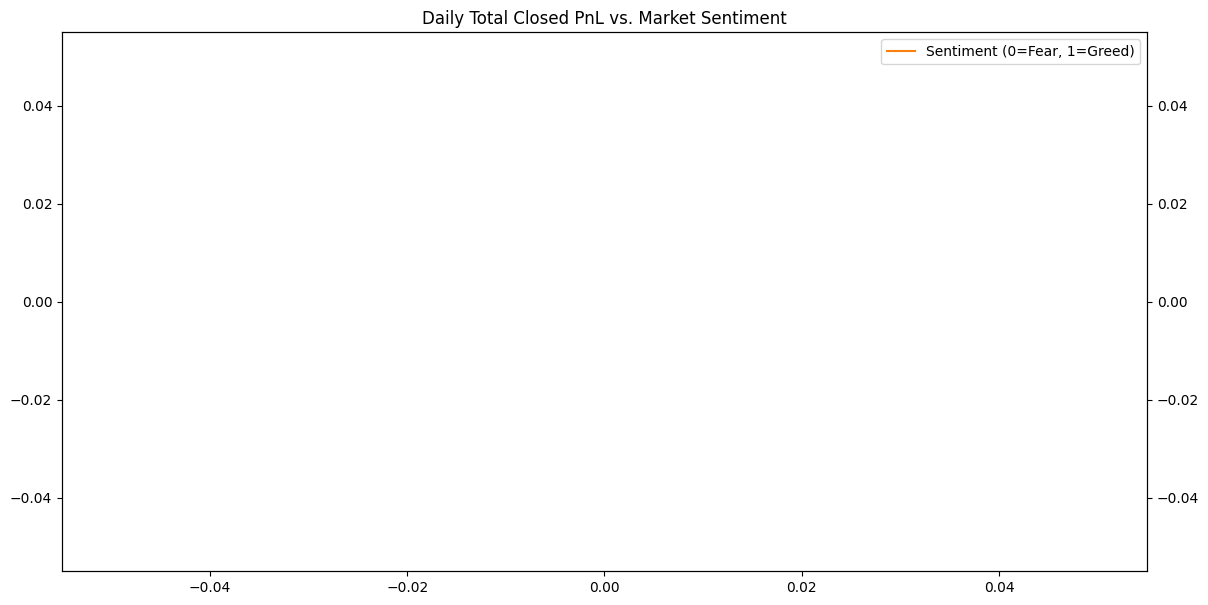

Not enough data for both 'Fear' and 'Greed' classifications to perform t-test.


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load datasets from local files (ensure uploaded to Colab)
fear_greed_file = '/content/fear_greed_index.csv'
historical_file = '/content/historical_data.csv'

fear_greed_df = pd.read_csv(fear_greed_file)
historical_df = pd.read_csv(historical_file)

# Print columns to verify
print("Fear/Greed Columns:", fear_greed_df.columns)
print("Historical Columns:", historical_df.columns)

# Preprocess Fear/Greed Dataset
# Use 'date' (lowercase) as it already exists
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date']).dt.date

# Preprocess Historical Trader Data
historical_df['time'] = pd.to_datetime(historical_df['Timestamp'])
historical_df['date'] = historical_df['time'].dt.date

# Verify Bitcoin symbol
print("Unique Coins:", historical_df['Coin'].unique())

# Filter for Bitcoin trades
btc_symbol = '@107'  # Adjust if necessary based on unique coins
bitcoin_trades = historical_df[historical_df['Coin'] == btc_symbol]

# Aggregate daily trading metrics
daily_trades_df = bitcoin_trades.groupby('date').agg(
    total_trades=('time', 'count'),
    total_volume=('Size Tokens', 'sum'),
    total_closedPnL=('Closed PnL', 'sum')
).reset_index()

# Merge datasets
merged_df = pd.merge(daily_trades_df, fear_greed_df, on='date', how='inner')

# Analyze by sentiment
sentiment_analysis = merged_df.groupby('classification').agg(
    mean_total_closedPnL=('total_closedPnL', 'mean'),
    mean_total_volume=('total_volume', 'mean'),
    total_trades=('total_trades', 'sum')
).reset_index()

print("Sentiment Analysis Results:")
print(sentiment_analysis)

# Visualize trends
plt.figure(figsize=(14, 7))
plt.plot(merged_df['date'], merged_df['total_closedPnL'], label='Daily Total Closed PnL', color='#1f77b4')
plt.twinx()
sentiment_num = merged_df['classification'].map({'Fear': 0, 'Greed': 1})
plt.plot(merged_df['date'], sentiment_num, label='Sentiment (0=Fear, 1=Greed)', color='#ff7f0e')
plt.legend()
plt.title('Daily Total Closed PnL vs. Market Sentiment')
plt.show()

# Statistical test
fear_pnl = merged_df[merged_df['classification'] == 'Fear']['total_closedPnL']
greed_pnl = merged_df[merged_df['classification'] == 'Greed']['total_closedPnL']
if len(fear_pnl) > 0 and len(greed_pnl) > 0:
    t_stat, p_value = ttest_ind(fear_pnl, greed_pnl)
    print(f"T-test Results: T-statistic = {t_stat}, p-value = {p_value}")
    if p_value < 0.05:
        print("There is a significant difference in mean total closed PnL between Fear and Greed periods.")
    else:
        print("There is no significant difference in mean total closed PnL between Fear and Greed periods.")
else:
    print("Not enough data for both 'Fear' and 'Greed' classifications to perform t-test.")